In [1]:
import kwant
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

C:\Users\caidi\Anaconda3\lib\site-packages\kwant\solvers\default.py:18: RuntimeWarning: MUMPS is not available, SciPy built-in solver will be used as a fallback. Performance can be very poor in this case.
  "Performance can be very poor in this case.", RuntimeWarning)


In [2]:
syst = kwant.Builder()

In [3]:
a = 1
lat = kwant.lattice.square(a)

In [4]:
t = 1
W = 10
L = 30
for i in range(L):
    for j in range(W):
        syst[lat(i,j)] = 4*t
        if j>0:
            syst[lat(i,j),lat(i,j-1)] = -t
            
        if i>0:
            syst[lat(i,j),lat(i-1,j)] = -t

sym_left_lead = kwant.TranslationalSymmetry((-a,0))
left_lead = kwant.Builder(sym_left_lead)

In [5]:
for j in range(W):
    left_lead[lat(0,j)] = 4*t
    if j>0:
        left_lead[lat(0,j),lat(0,j-1)] = -t
    left_lead[lat(1,j),lat(0,j)] = -t

In [6]:
syst.attach_lead(left_lead)

[]

In [7]:
sym_right_lead = kwant.TranslationalSymmetry((a,0))
right_lead = kwant.Builder(sym_right_lead)
for j in range(W):
    right_lead[lat(0,j)] = 4*t
    if j>0:
        right_lead[lat(0,j),lat(0,j-1)]=-t
    right_lead[lat(1,j),lat(0,j)] = -t

In [8]:
syst.attach_lead(right_lead)

[]

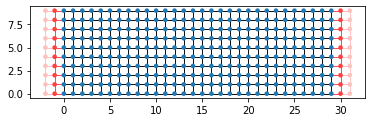

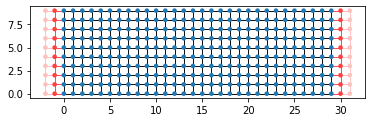

In [9]:
kwant.plot(syst)

In [10]:
syst = syst.finalized()

In [11]:
energies = []
data = []

for ie in range(100):
    energy = ie * 0.01
    smatrix = kwant.smatrix(syst,energy)
    energies.append(energy)
    data.append(smatrix.transmission(1,0))

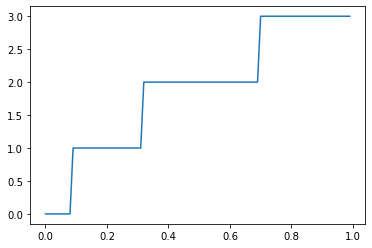

In [12]:
plt.figure()
plt.plot(energies,data)
plt.show()

In [13]:
def make_system(a=1,t=1,W=10,L=30):
    lat = kwant.lattice.square(a)
    syst = kwant.Builder()
    syst[(lat(x,y) for x in range(L) for y in range(W))] = 4*t
    syst[lat.neighbors()] = -t
    lead = kwant.Builder(kwant.TranslationalSymmetry((-a,0)))
    lead[(lat(0,j) for j in range(W))] = 4*t
    lead[lat.neighbors()] = -t
    syst.attach_lead(lead)
    syst.attach_lead(lead.reversed())
    return syst

def plot_conductance(syst,energies):
    data = []
    for energy in energies:
        smatrix = kwant.smatrix(syst,energy)
        data.append(smatrix.transmission(1,0))
    plt.figure()
    plt.plot(energies,data)
    plt.xlabel("energy [t]")
    plt.ylabel("conductance [e^2/h]")
    plt.show()

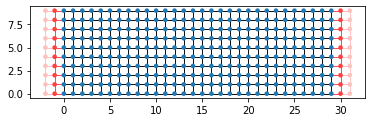

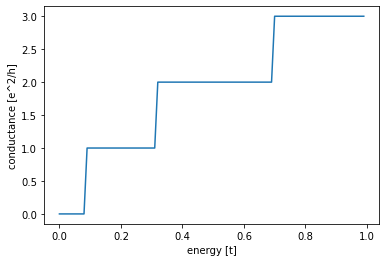

In [14]:
syst = make_system()
kwant.plot(syst)
syst = syst.finalized()
plot_conductance(syst,energies = [0.01 *i for i in range(100)])

In [29]:
import tinyarray
sigma_0 = tinyarray.array([[1, 0], [0, 1]])
sigma_x = tinyarray.array([[0, 1], [1, 0]])
sigma_y = tinyarray.array([[0, -1j], [1j, 0]])
sigma_z = tinyarray.array([[1, 0], [0, -1]])

In [30]:
syst[()]